# EDSA - Climate Change Belief Analysis 2021
Predict a# Team ZM3 EDSA - Climate Change Belief Analysis 2021

Predict an individual’s belief in climate change based on historical tweet data

###### Members
1. Ndamulelo Innocent Nelwamondo
2. Thobekani Masondo
3. Nomvuselelo Simelane
4. John Sekgobela
5. Namhla Sokapase
6. Sandra Malope

In [38]:
# We will be using Comet as a form of version control throughout the development of our model
from comet_ml import Experiment

In [39]:
# Create an experiment with your api key
experiment = Experiment(
    api_key="KQ1UTh7hBvPLWlz3034oIgusG",
    project_name="global-warming-climate-change-sentiment-analysis-zm3",
    workspace="thobekanimasondo84-gmail-com",)

COMET INFO: ---------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : https://www.comet.ml/thobekanimasondo84-gmail-com/global-warming-climate-change-sentiment-analysis-zm3/a4b06d8512ca4f10a1b45c2bd106ed40
COMET INFO:   Uploads:
COMET INFO:     environment details      : 1
COMET INFO:     filename                 : 1
COMET INFO:     git metadata             : 1
COMET INFO:     git-patch (uncompressed) : 1 (8 MB)
COMET INFO:     installed packages       : 1
COMET INFO: ---------------------------
COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET INFO: Experiment is live on comet.ml https://www.comet.ml/thobekanimasondo84-gmail-com/global-warming-climate-change-sentiment-analysis-zm3/0ab5d5ba95a1458499e7933c4efb

### Introduction

###### Using Twitter to measure the impact of climate change:
As the climate crisis intensifies and natural disasters become more frequent and powerful, scientists are increasingly turning to social media as a way to assess the damage and impact on a more localized scale. In our case, Twitter was useful given the geographical reach of Twitter as well as the volume and location-specific nature of tweets. The platform can be used to track how individuals feel about climate change and how they view climate change.

Social media encourages greater knowledge of climate change, mobilization of climate change activists, space for discussing the issue with others, and online discussions that frame climate change as a negative for society. Social media, however, does provide space for framing climate change skeptically and activating those with a skeptical perspective of climate change.
<div align="center" style="width: 500px; font-size: 80%; text-align: center; margin: 0 auto">
<img src="https://media.tenor.com/images/47d160eabb0927ed23827ab099ee83c3/tenor.gif"
     alt="Dummy image 1"
     style="float: center; padding-bottom=0.5em"
     width=500px/>

## Problem statement

*Many companies are built around lessening one’s environmental impact or carbon footprint. They offer products and services that are environmentally friendly and sustainable, in line with their values and ideals. They would like to determine how people perceive climate change and whether or not they believe it is a real threat. This would add to their market research efforts in gauging how their product/service may be received.*

*With this context, EDSA is challenging you during the Classification Sprint with the task of creating a Machine Learning model that is able to classify whether or not a person believes in climate change, based on their novel tweet data.*

*Providing an accurate and robust solution to this task gives companies access to a broad base of consumer sentiment, spanning multiple demographic and geographic categories - thus increasing their insights and informing future marketing strategies.*

<div align="center" style="width: 500px; font-size: 80%; text-align: center; margin: 0 auto">
<img src="https://en.reset.org/files/imagecache/sc_832x468/2018/02/27/planet_earth.jpg"
     alt="Dummy image 1"
     style="float: center; padding-bottom=0.5em"
     width=500px/>

### Python Libraries
First we need to load the libraries we are going to use throughout our notebook. After which we will load our train and test data.

In [40]:
# Standard libraries
# Standard libraries
import re
import csv
import nltk
import spacy
import string
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

# Style
import matplotlib.style as style 
sns.set(font_scale=1.5)
style.use('seaborn-pastel')
style.use('seaborn-poster')
from PIL import Image
from wordcloud import WordCloud

# Downloads
#nlp = spacy.load('en')
nlp = spacy.blank('en')
nlp = spacy.blank('zh')
nlp = spacy.blank('xx') # multilanguage (spaCy provides support for languages) 
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')

# Preprocessing
import en_core_web_sm
from collections import Counter
from nltk.probability import FreqDist
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer 
from nltk.corpus import stopwords, wordnet  
from sklearn.feature_extraction.text import CountVectorizer   
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer 
from sklearn.model_selection import train_test_split, RandomizedSearchCV

# Building classification models
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# Model evaluation
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, f1_score, precision_score, recall_score

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Webster\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Webster\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Webster\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Webster\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [41]:
# import dataset 
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test_with_no_labels.csv')
sub_df = pd.read_csv('Submission.csv')

### Data Description
The collection of this data was funded by a Canada Foundation for Innovation JELF Grant to Chris Bauch, University of Waterloo. The dataset aggregates tweets pertaining to climate change collected between Apr 27, 2015 and Feb 21, 2018. In total, 43943 tweets were collected. Each tweet is labelled as one of the following classes:
<div align="center" style="width: 500px; font-size: 80%; text-align: center; margin: 0 auto">
<img src="https://www.googleapis.com/download/storage/v1/b/kaggle-user-content/o/inbox%2F2205222%2F8e4d65f2029797e0462b52022451829c%2Fdata.PNG?generation=1590752860255531&alt=media"
     alt="Dummy image 1"
     style="float: center; padding-bottom=0.5em"
     width=500px/>


In [42]:
print(train_df.shape)
print(test_df.shape)

display(train_df.head())
display(test_df.head())

(15819, 3)
(10546, 2)


,sentiment,message,tweetid
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221
1,1,It's not like we lack evidence of anthropogeni...,126103
2,2,RT @RawStory: Researchers say we have three ye...,698562
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954


,message,tweetid
0,Europe will now be looking to China to make su...,169760
1,Combine this with the polling of staffers re c...,35326
2,"The scary, unimpeachable evidence that climate...",224985
3,@Karoli @morgfair @OsborneInk @dailykos \nPuti...,476263
4,RT @FakeWillMoore: 'Female orgasms cause globa...,872928


In [43]:
# Looking for duplicates
percent_duplicates = round((1-(train_df['message'].nunique()/len(train_df['message'])))*100,2)
print('Duplicated tweets in train data:')
print(percent_duplicates,'%')

Duplicated tweets in train data:
10.05 %


### Pre-processing
Before we continue exploring our data we will have to do some preprocessing in order to gain maximum insights:

- Extract hashtags and store them in separate dataframes for each class
- Remove 'noisy entities' such as URL's, punctuations, mentions, numbers and extra white space.
- Tokenization
- Perform part of speech tagging (POS) and lemmatization
- Specific named entity extraction

###### Create a copy

The first step in the preprocessing is to create a copy of the train dataframe for the EDA.

In [44]:
def update(df):

    df = train_df.copy()
    sentiment = df['sentiment']
    word_sentiment = []

    for i in sentiment :
        if i == 1 :
            word_sentiment.append('Pro')
        elif i == 0 :
            word_sentiment.append('Neutral')
        elif i == -1 :
            word_sentiment.append('Anti')
        else :
            word_sentiment.append('News')

    df['sentiment'] = word_sentiment
    
    return df

df = update(train_df)
df.head()

,sentiment,message,tweetid
0,Pro,PolySciMajor EPA chief doesn't think carbon di...,625221
1,Pro,It's not like we lack evidence of anthropogeni...,126103
2,News,RT @RawStory: Researchers say we have three ye...,698562
3,Pro,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736
4,Pro,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954


#### Hashtag extraction
Hashtags are extracted from the original tweets and stored in seperate dataframes for each class. This is done before tweet cleaning to ensure no information is lost.

In [45]:
def hashtag_extract(tweet):
    hashtags = []
    
    for i in tweet:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)
        
    hashtags = sum(hashtags, [])
    frequency = nltk.FreqDist(hashtags)
    
    hashtag_df = pd.DataFrame({'hashtag': list(frequency.keys()),
                       'count': list(frequency.values())})
    hashtag_df = hashtag_df.nlargest(15, columns="count")

    return hashtag_df

# Extracting the hashtags from tweets in each class
pro = hashtag_extract(df['message'][df['sentiment'] == 'Pro'])
anti = hashtag_extract(df['message'][df['sentiment'] == 'Anti'])
neutral = hashtag_extract(df['message'][df['sentiment'] == 'Neutral'])
news = hashtag_extract(df['message'][df['sentiment'] == 'News'])

pro.head()

,hashtag,count
19,climate,187
24,BeforeTheFlood,129
68,climatechange,94
13,ImVotingBecause,62
4,COP22,59


#### Tweet cleaning
Remove 'noisy entities' such as URL's, punctuations, mentions, numbers and extra white space. The data is further normalized by converting all letters to lowercase.

In [46]:
def TweetCleaner(tweet):
    # Convert everything to lowercase
    tweet = tweet.lower() 
    
    # Remove mentions   
    tweet = re.sub('@[\w]*','',tweet)  
    
    # Remove url's
    tweet = re.sub(r'https?:\/\/.*\/\w*', '', tweet)
    
    # Remove hashtags
    tweet = re.sub(r'#\w*', '', tweet)    
    
    # Remove numbers
    tweet = re.sub(r'\d+', '', tweet)  
    
    # Remove punctuation
    tweet = re.sub(r"[,.;':@#?!\&/$]+\ *", ' ', tweet)
    
    # Remove that funny diamond
    tweet = re.sub(r"U+FFFD ", ' ', tweet)
    
    # Remove extra whitespace
    tweet = re.sub(r'\s\s+', ' ', tweet)
    
    # Remove space in front of tweet
    tweet = tweet.lstrip(' ')                        
    
    return tweet

# Clean the tweets in the message column
df['message'] = df['message'].apply(TweetCleaner)
df['message'] = df['message'].apply(TweetCleaner)

df.head()

,sentiment,message,tweetid
0,Pro,polyscimajor epa chief doesn t think carbon di...,625221
1,Pro,it s not like we lack evidence of anthropogeni...,126103
2,News,rt researchers say we have three years to act ...,698562
3,Pro,wired was a pivotal year in the war on climate...,573736
4,Pro,rt it s and a racist sexist climate change den...,466954


#### Parts of speech tagging and lemmatization
In this step we start by determining the length of each tweet and storing this information in a new column. We then tokenize the tweets before performing POS tagging on each word followed by lemmatization.

In lemmatization, we reduce the word into dictionary root form. For instance "cats" is converted into "cat". Lemmatization is done in order to avoid creating features that are semantically similar but syntactically different. Lemmatization is preferred over stemming since stemming is a crude method for cataloging related words; it essentially chops off letters from the end until the stem is reached. This works fairly well in most cases, but unfortunately English has many exceptions where a more sophisticated process is required

In [47]:
def lemma(df):
    df['length'] = df['message'].str.len()
    df['tokenized'] = df['message'].apply(word_tokenize)
    df['pos_tags'] = df['tokenized'].apply(nltk.tag.pos_tag)

    def get_wordnet_pos(tag):

        if tag.startswith('J'):
            return wordnet.ADJ

        elif tag.startswith('V'):
            return wordnet.VERB

        elif tag.startswith('N'):
            return wordnet.NOUN

        elif tag.startswith('R'):
            return wordnet.ADV
    
        else:
            return wordnet.NOUN
        
    wnl = WordNetLemmatizer()
    df['pos_tags'] = df['pos_tags'].apply(lambda x: [(word, get_wordnet_pos(pos_tag)) for (word, pos_tag) in x])
    df['lemmatized'] = df['pos_tags'].apply(lambda x: [wnl.lemmatize(word, tag) for word, tag in x])
    df['lemmatized'] = [' '.join(map(str, l)) for l in df['lemmatized']]  
    return df

df = lemma(df)
df.head()

,sentiment,message,tweetid,length,tokenized,pos_tags,lemmatized
0,Pro,polyscimajor epa chief doesn t think carbon di...,625221,102,"[polyscimajor, epa, chief, doesn, t, think, ca...","[(polyscimajor, a), (epa, n), (chief, n), (doe...",polyscimajor epa chief doesn t think carbon di...
1,Pro,it s not like we lack evidence of anthropogeni...,126103,62,"[it, s, not, like, we, lack, evidence, of, ant...","[(it, n), (s, v), (not, r), (like, n), (we, n)...",it s not like we lack evidence of anthropogeni...
2,News,rt researchers say we have three years to act ...,698562,86,"[rt, researchers, say, we, have, three, years,...","[(rt, n), (researchers, n), (say, v), (we, n),...",rt researcher say we have three year to act on...
3,Pro,wired was a pivotal year in the war on climate...,573736,54,"[wired, was, a, pivotal, year, in, the, war, o...","[(wired, v), (was, v), (a, n), (pivotal, a), (...",wire be a pivotal year in the war on climate c...
4,Pro,rt it s and a racist sexist climate change den...,466954,81,"[rt, it, s, and, a, racist, sexist, climate, c...","[(rt, v), (it, n), (s, n), (and, n), (a, n), (...",rt it s and a racist sexist climate change den...


#### Word frequency
Creating separate dataframes to store the 25 most frequent words and their respective frequencies for each class. Once this information has been extracted we will use these words to create wordclouds for each class.

Word clouds are a popular approach in nlp tasks, here they help us visualize and gain a better understanding of what is being said in each class.

In [48]:
def frequency(tweet):
    # Count vectorizer excluding english stopwords
    cv = CountVectorizer(stop_words='english')
    words = cv.fit_transform(tweet)
    
    # Count the words in the tweets and determine the frequency of each word
    sum_words = words.sum(axis=0)
    words_freq = [(word, sum_words[0, i]) for word, i in cv.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    
    # Create a dataframe to store the top 25 words and their frequencies
    frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])
    frequency = frequency.head(25)
    
    return frequency

# Extract the top 25 words in each class
pro_frequency = frequency(df['lemmatized'][df['sentiment']=='Pro'])
anti_frequency = frequency(df['lemmatized'][df['sentiment']=='Anti'])
news_frequency = frequency(df['lemmatized'][df['sentiment']=='News'])
neutral_frequency = frequency(df['lemmatized'][df['sentiment']=='Neutral'])

In [49]:
# Extract the words in the tweets for the pro and anti climate change classes 
anti_words = ' '.join([text for text in anti_frequency['word']])
pro_words = ' '.join([text for text in pro_frequency['word']])
news_words = ' '.join([text for text in news_frequency['word']])
neutral_words = ' '.join([text for text in neutral_frequency['word']])

# Create wordcloud for the anti climate change class
anti_wordcloud = WordCloud(width=800, 
                           height=500, 
                           random_state=110, 
                           max_font_size=110, 
                           background_color='white',
                           colormap="Reds").generate(anti_words)

# Create wordcolud for the pro climate change class
pro_wordcloud = WordCloud(width=800, 
                          height=500, 
                          random_state=73, 
                          max_font_size=110, 
                          background_color='white',
                          colormap="Greens").generate(pro_words)

# Create wordcolud for the news climate change class
news_wordcloud = WordCloud(width=800, 
                          height=500, 
                          random_state=0, 
                          max_font_size=110, 
                          background_color='white',
                          colormap="Blues").generate(news_words)

# Create wordcolud for the neutral climate change class
neutral_wordcloud = WordCloud(width=800, 
                          height=500, 
                          random_state=10, 
                          max_font_size=110, 
                          background_color='white',
                          colormap="Oranges").generate(neutral_words)

pro_frequency.tail()

,word,freq
20,http,359
21,make,322
22,like,318
23,warm,313
24,husband,312


#### Specific named entity recognition and extraction
Extracting the top 10 organisations, people and geopolitical entities in each class. This information is then stored in separate dataframes for each class.

In [50]:
def entity_extractor(tweet):
    
    def get_people(tweet):  
        words = nlp(tweet)
        people = [w.text for w in words.ents if w.label_== 'PERSON']
        return people
    
    def get_org(tweet):
        words = nlp(tweet)
        org = [w.text for w in words.ents if w.label_== 'ORG']
        return org
    
    def get_gpe(tweet):
        words = nlp(tweet)
        gpe = [w.text for w in words.ents if w.label_== 'GPE']
        return gpe
    
    # Extract the top 10 people
    people = tweet.apply(lambda x: get_people(x)) 
    people = [x for sub in people for x in sub]
    people_counter = Counter(people)
    people_count = people_counter.most_common(10)
    people_count = map(list, zip(*people_count))
    
    # Extract the top 10 organizations
    org = tweet.apply(lambda x: get_org(x)) 
    org = [x for sub in org for x in sub]
    org_counter = Counter(org)
    org_count = org_counter.most_common(10)
    org_count = map(list, zip(*org_count))
    
    # Extract the top 10 geopolitical entities
    gpe = tweet.apply(lambda x: get_gpe(x)) 
    gpe = [x for sub in gpe for x in sub]
    gpe_counter = Counter(gpe)
    gpe_count = gpe_counter.most_common(10)
    gpe_count = map(list, zip(*gpe_count))
    
    # Create a dataframe to store the information
    df = pd.DataFrame({'people' : people})
    df['geopolitics'] = gpe
    df['organizations'] = org
    
    return df

# Extract top entities for each class
anti_info = entity_extractor(df['lemmatized'][df['sentiment']== 'Anti'])
pro_info = entity_extractor(df['lemmatized'][df['sentiment']== 'Pro'])
news_info = entity_extractor(df['lemmatized'][df['sentiment']== 'News'])
neutral_info = entity_extractor(df['lemmatized'][df['sentiment']== 'Neutral'])

## Exploratory data analysis

#### Target variable distribution
Taking a closer look at the distribution of the tweets we notice that the data is severely imbalanced with the majority of tweets falling in the 'pro' category, supporting the belief of man-made climate change.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
<ipython-input-51-0a1db2129c5a>:20: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


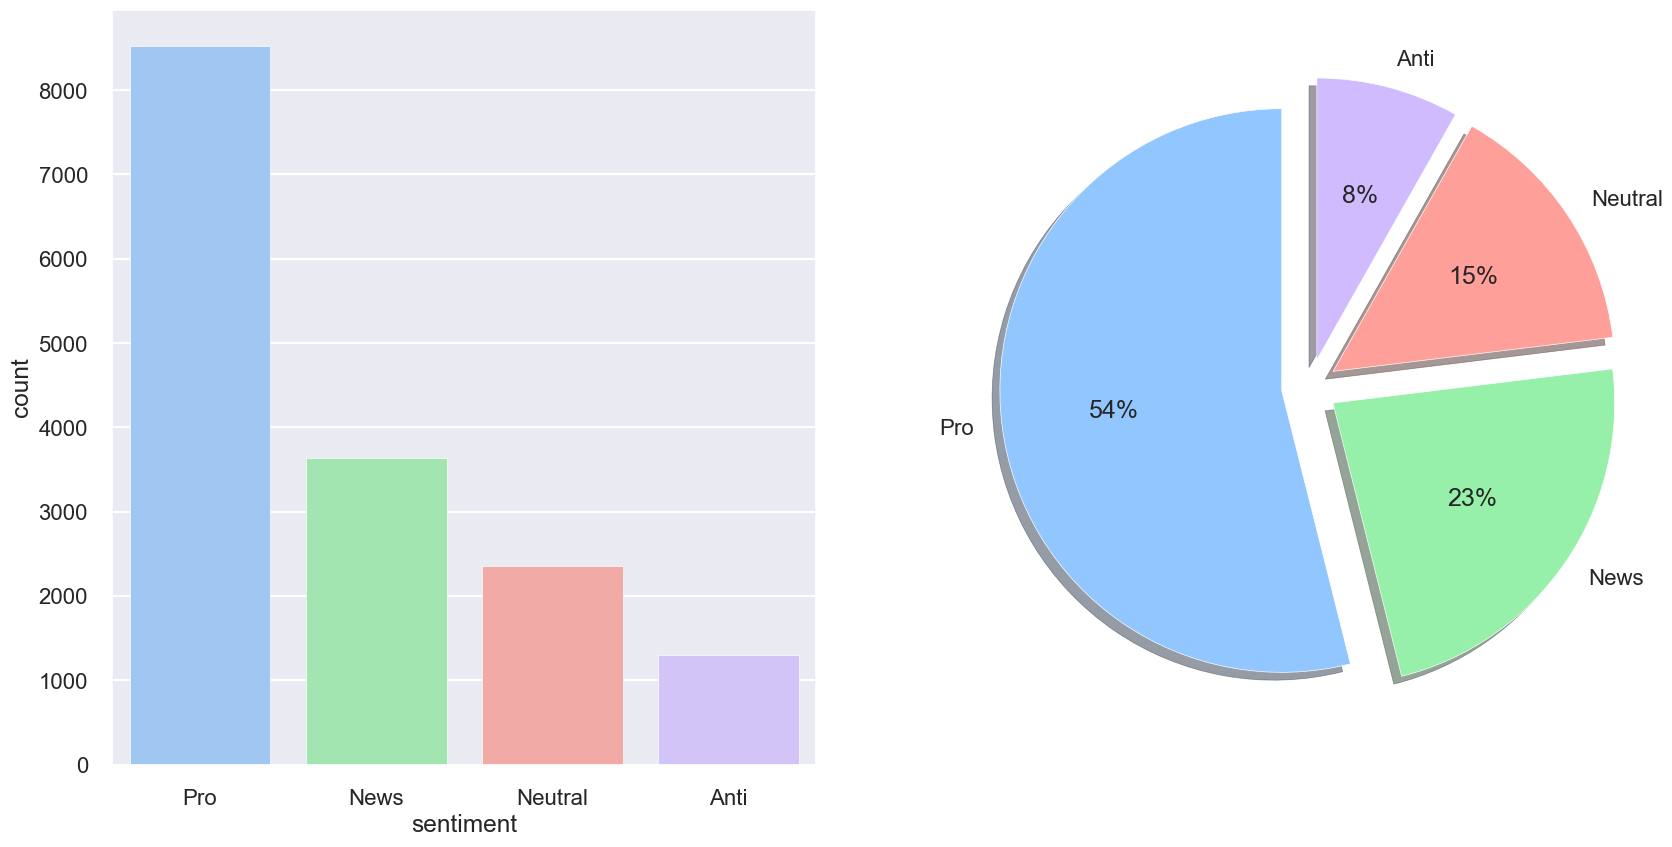

In [51]:
# Display target distribution
style.use('seaborn-pastel')

fig, axes = plt.subplots(ncols=2, 
                         nrows=1, 
                         figsize=(20, 10), 
                         dpi=100)

sns.countplot(df['sentiment'], ax=axes[0])

labels=['Pro', 'News', 'Neutral', 'Anti'] 

axes[1].pie(df['sentiment'].value_counts(),
            labels=labels,
            autopct='%1.0f%%',
            shadow=True,
            startangle=90,
            explode = (0.1, 0.1, 0.1, 0.1))

fig.show()

#### Tweet length distribution
From the plots below we can see that tweets that fall in the pro climate change class are generally longer and the shortest tweets belong to the anti climate change class. We also notice that neutral climate change tweets tend to have the most variability in tweet length.

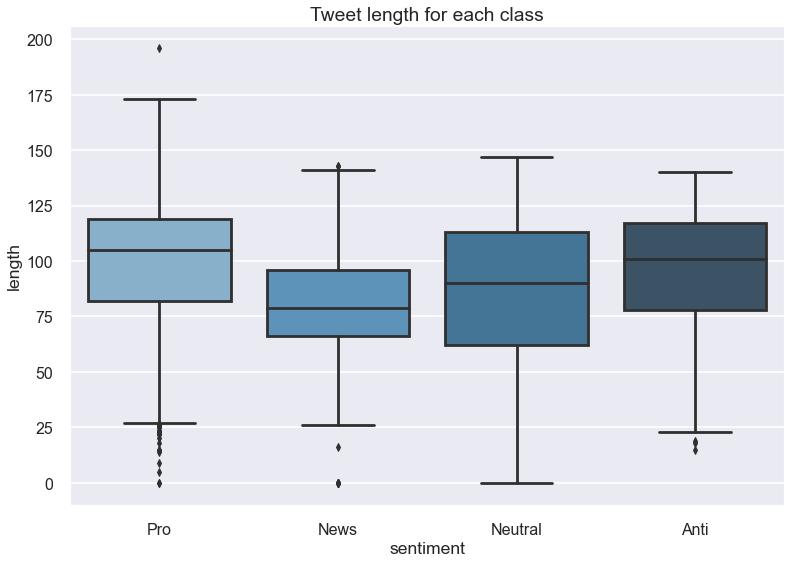

In [52]:
# Plot the distribution of the length tweets for each class using a box plot
sns.boxplot(x=df['sentiment'], y=df['length'], data=df, palette=("Blues_d"))
plt.title('Tweet length for each class')
plt.show()

#### Climate change common words
The figures below display the 25 most common words found in the tweets for each classes.

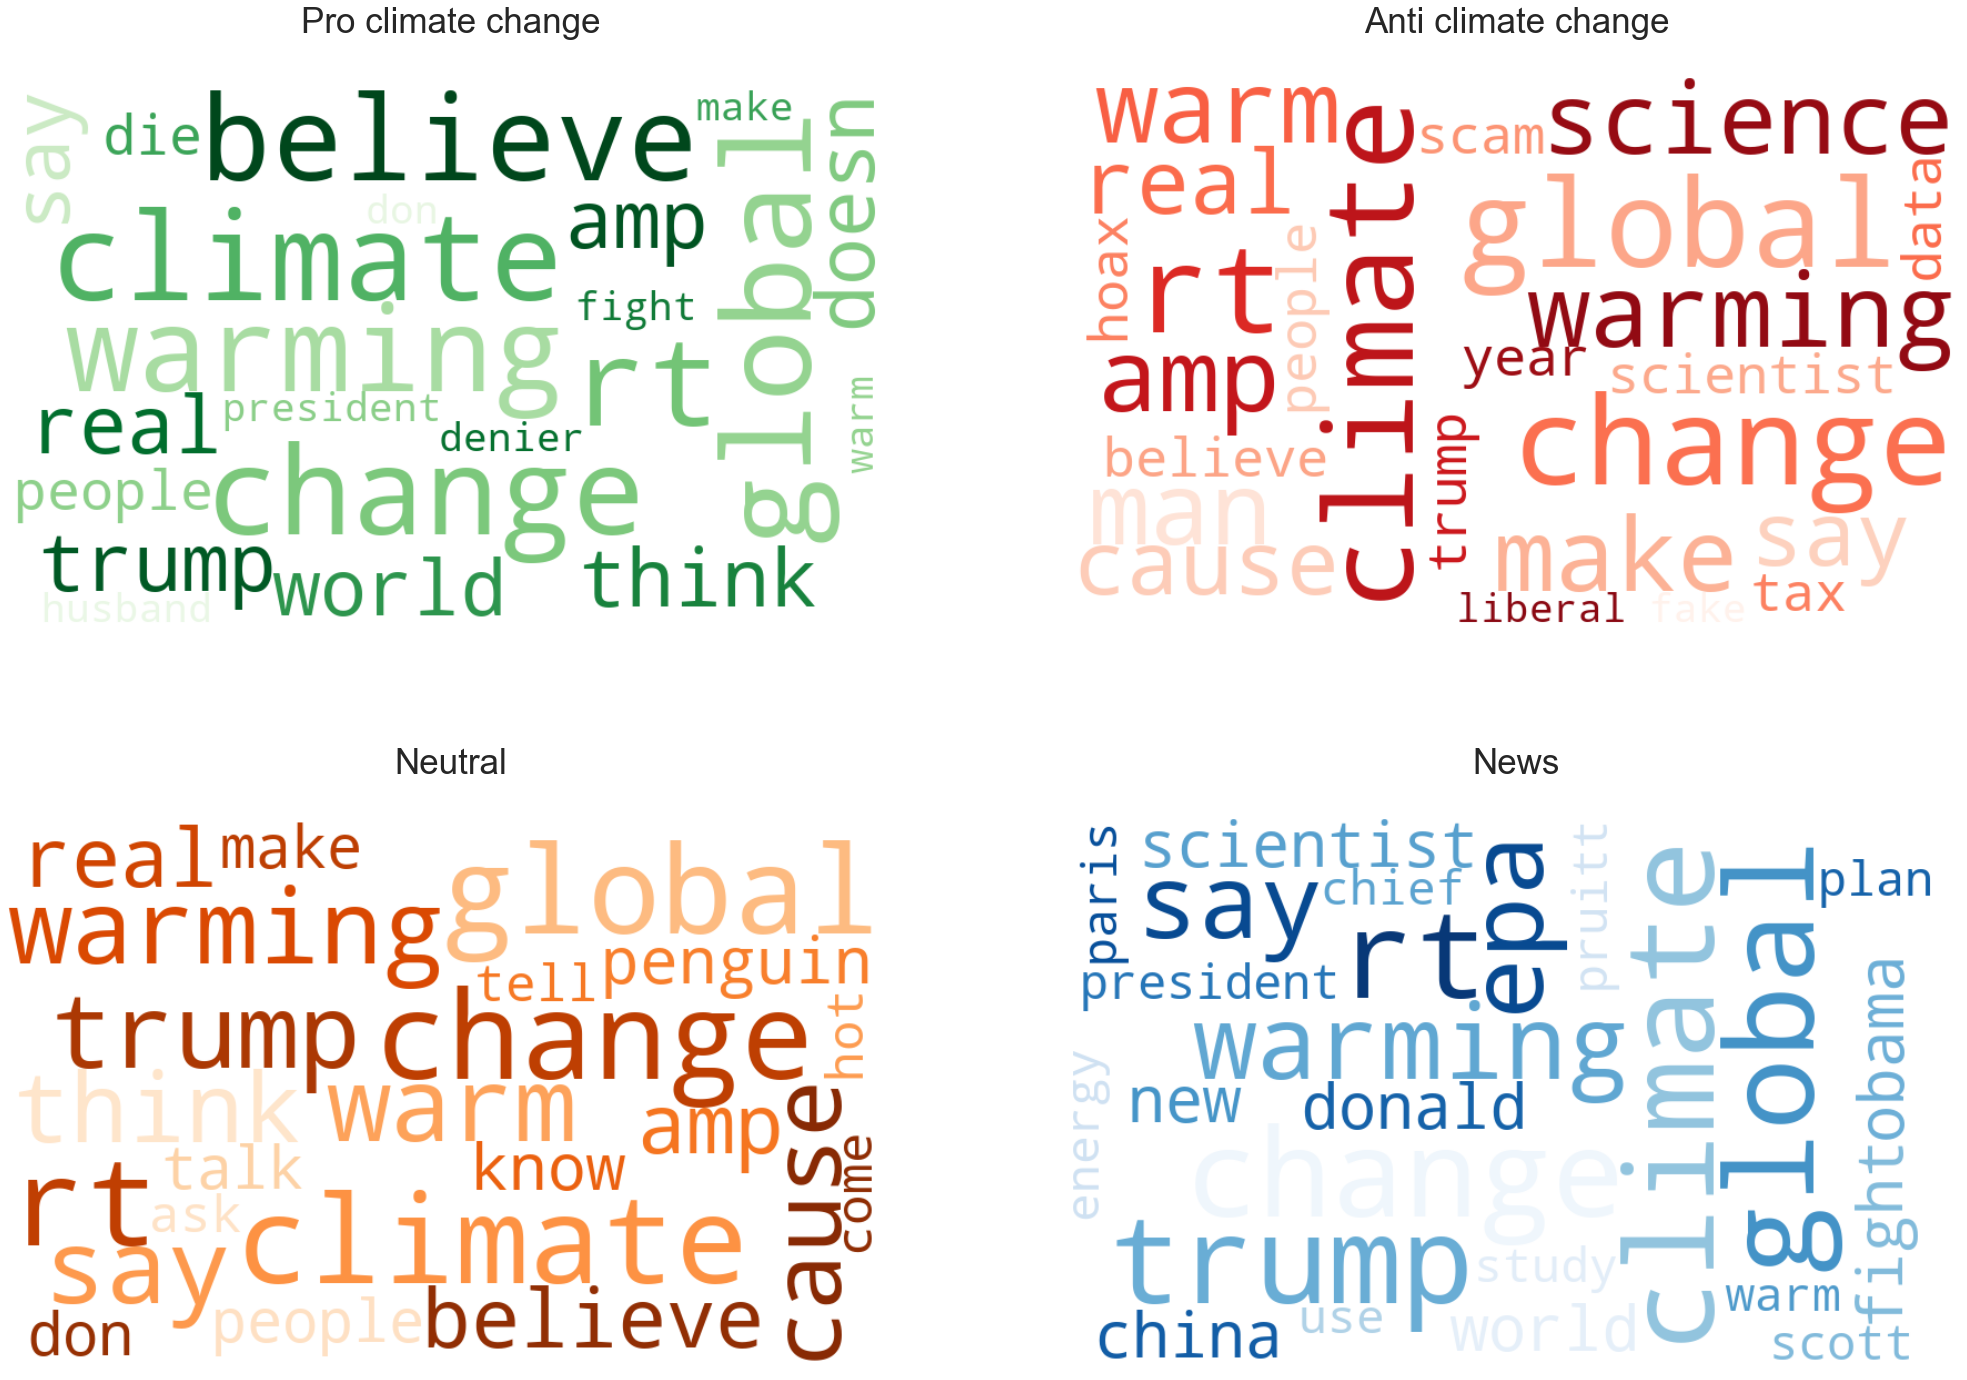

Pro climate change buzzwords 20-25 shown here for clarity 
- The wordcloud doesn't seem to pick up on 'http'


,word,freq
20,http,359
21,make,322
22,like,318
23,warm,313
24,husband,312


In [53]:
# Plot pro and anti wordclouds next to one another for comparisson
f, axarr = plt.subplots(2,2, figsize=(35,25))
axarr[0,0].imshow(pro_wordcloud, interpolation="bilinear")
axarr[0,1].imshow(anti_wordcloud, interpolation="bilinear")
axarr[1,0].imshow(neutral_wordcloud, interpolation="bilinear")
axarr[1,1].imshow(news_wordcloud, interpolation="bilinear")

# Remove the ticks on the x and y axes
for ax in f.axes:
    plt.sca(ax)
    plt.axis('off')

axarr[0,0].set_title('Pro climate change\n', fontsize=35)
axarr[0,1].set_title('Anti climate change\n', fontsize=35)
axarr[1,0].set_title('Neutral\n', fontsize=35)
axarr[1,1].set_title('News\n', fontsize=35)
#plt.tight_layout()
plt.show()

print("Pro climate change buzzwords 20-25 shown here for clarity \n- The wordcloud doesn't seem to pick up on 'http'")
display(pro_frequency.tail())

#### Hashtags
Hashtags have long been an important tool on Twitter for helping users organize and sort their tweets. They're a great way to indicate that your content is relevant to a certain topic and to get your tweets in front of an interested audience.

Considering this, we decided it might be insightful to see what the most frequent hashtags in each class are. This will help us gain a better understanding of what kind of information is being consumed and shared in each class.

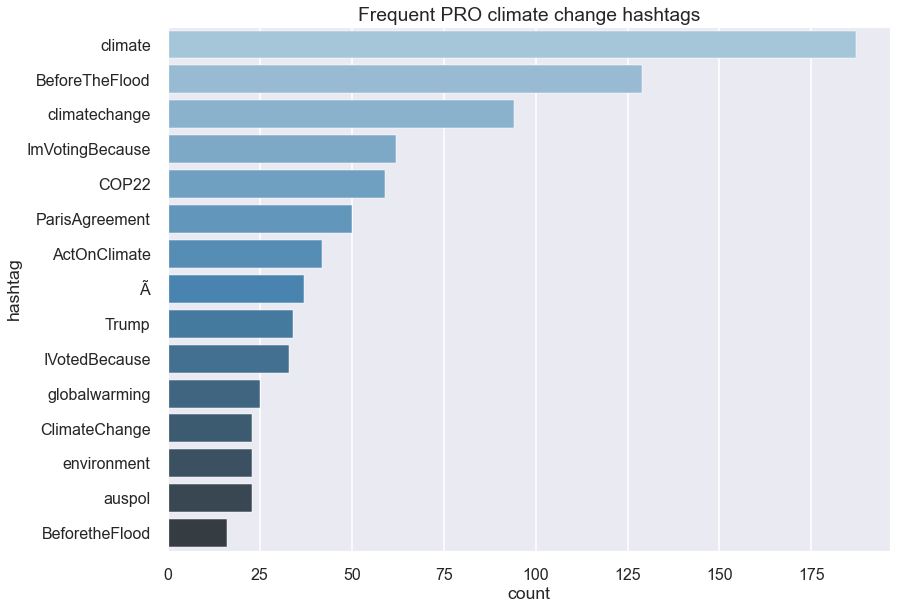

In [54]:
# Plot the frequent hastags for pro and anti climate change classes
sns.barplot(data=pro,y=pro['hashtag'], x=pro['count'], palette=("Blues_d"))
plt.title('Frequent PRO climate change hashtags')
plt.tight_layout()

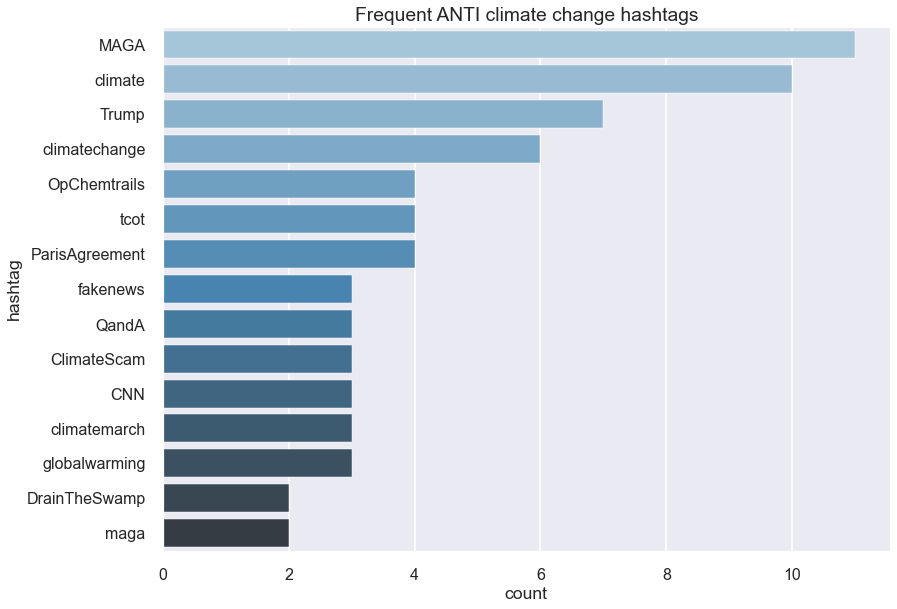

In [55]:
sns.barplot(data=anti,y=anti['hashtag'], x=anti['count'], palette=("Blues_d"))
plt.title('Frequent ANTI climate change hashtags')
plt.tight_layout()

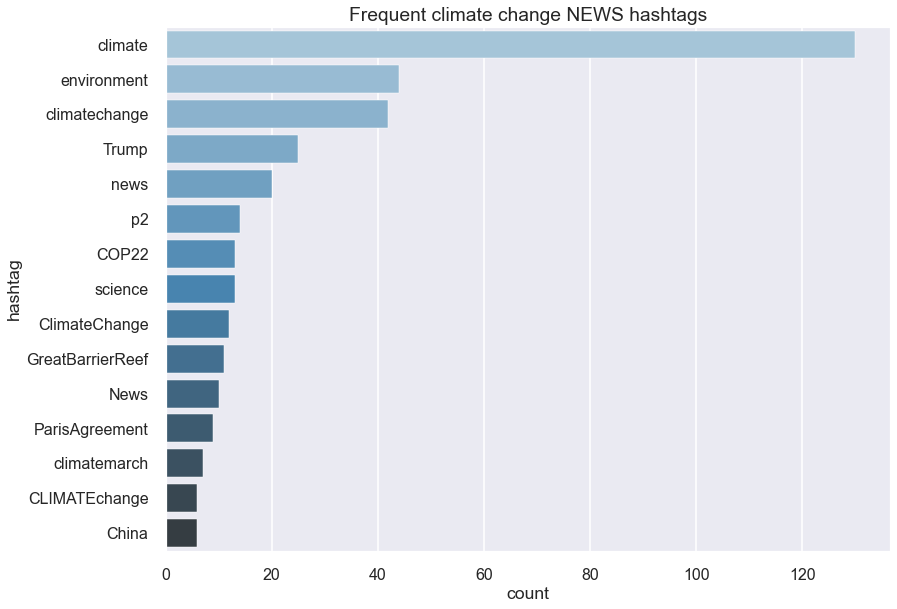

In [56]:
# Plot the frequent hastags for the news and neutral classes
sns.barplot(y=news['hashtag'], x=news['count'], palette=("Blues_d"))
plt.title('Frequent climate change NEWS hashtags')
plt.tight_layout()

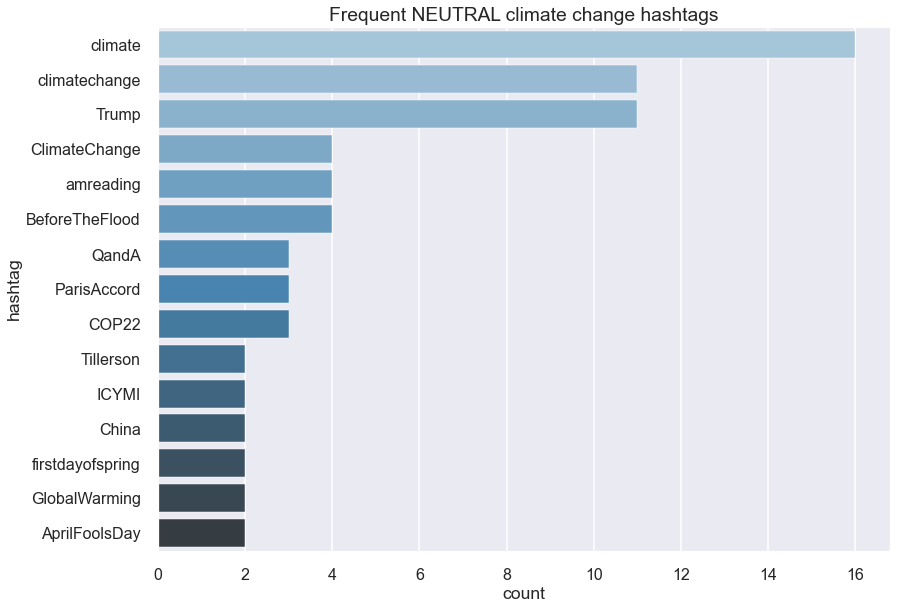

In [57]:
sns.barplot(y=neutral['hashtag'], x=neutral['count'], palette=("Blues_d"))
plt.title('Frequent NEUTRAL climate change hashtags')
plt.tight_layout()

## Building classification models

We will be making use of a pipeline to build our classification models. This pipeline will vectorize the text data before fitting it to our chosen model.

The following 5 models will be considered:

- Random forest
- Naive Bayes
- K nearest neighbors
- Logistic regression
- Linear SVC

#### Train - Validation split

Before we pass our data through our custom pipelines we have to split our train data into features and target variables. After this step we can split our train data into a train and validation set. This will allow us to evaluate our model performance and chose the best model to use for our submission

In [58]:
# Split the dataset into train & validation (20%) for model training

# Seperate features and tagret variables
X = train_df['message']
y = train_df['sentiment']

# Split the train data to create validation dataset
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

#### Pipelines

Pipelines consist of 2 steps, vectorization and model fitting.

Machines, unlike humans, cannot understand the raw text. Machines can only see numbers. Particularly, statistical techniques such as machine learning can only deal with numbers. Therefore, we need to convert our text into numbers.

The TFIDF vectorizer assigns word frequency scores that try to highlight words that are more interesting, e.g. frequent in a document but not across documents. The TfidfVectorizer will tokenize documents, learn the vocabulary and inverse document frequency weightings, and allow you to encode new documents. Another advantage of this method is that the resulting vectors are already scaled.

In [59]:
# Random Forest Classifier
rf = Pipeline([('tfidf', TfidfVectorizer()),
               ('clf', RandomForestClassifier(max_depth=5, 
                                              n_estimators=100))])

# Naïve Bayes:
nb = Pipeline([('tfidf', TfidfVectorizer()),
               ('clf', MultinomialNB())])

# K-NN Classifier
knn = Pipeline([('tfidf', TfidfVectorizer()),
                ('clf', KNeighborsClassifier(n_neighbors=5, 
                                             metric='minkowski', 
                                             p=2))])

# Logistic Regression
lr = Pipeline([('tfidf',TfidfVectorizer()),
               ('clf',LogisticRegression(C=1, 
                                         class_weight='balanced', 
                                         max_iter=1000))])
# Linear SVC:
lsvc = Pipeline([('tfidf', TfidfVectorizer()),
                 ('clf', LinearSVC(class_weight='balanced'))])

#### Train the models

The models are trained by passing the train data through each custom pipeline. The trained models are then used to predict the classes for the validation data set.

In [60]:
# Random forest 
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_valid)

# Niave bayes
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_valid)

# K - nearest neighbors
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_valid)

# Linear regression
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_valid)

# Linear SVC
lsvc.fit(X_train, y_train)
y_pred_lsvc = lsvc.predict(X_valid)

COMET ERROR: Failed to extract parameters from estimator


## Model evaluation

The performance of each model will be evaluated based on the precision, accuracy and F1 score achieved when the model is used to predict the classes for the validation data. We will be looking at the following to determine and visualize these metrics:

Classification report
Confusion matrix
The best model will be selected based on the weighted F1 score.

C:\Users\Webster\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Webster\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Webster\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(resu

              precision    recall  f1-score   support

          -1       0.00      0.00      0.00       278
           0       0.00      0.00      0.00       425
           1       0.55      1.00      0.71      1755
           2       0.00      0.00      0.00       706

    accuracy                           0.55      3164
   macro avg       0.14      0.25      0.18      3164
weighted avg       0.31      0.55      0.40      3164



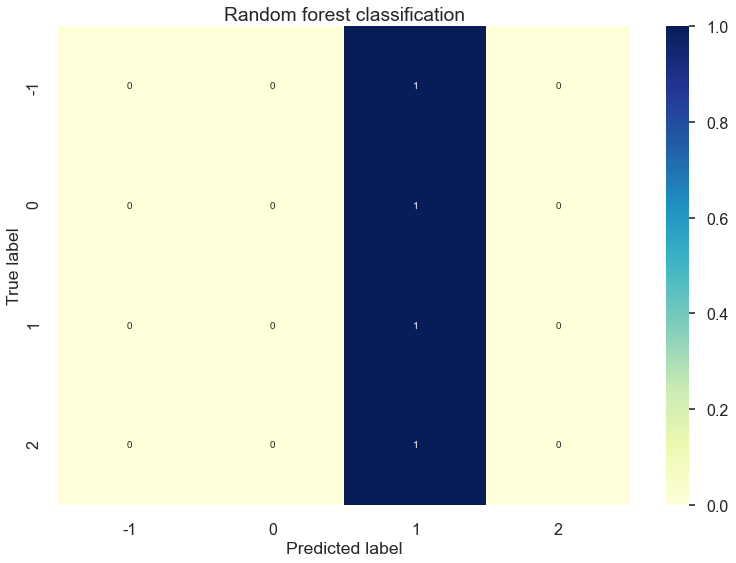

In [61]:
# Generate a classification Report for the random forest model
print(metrics.classification_report(y_valid, y_pred_rf))

# Generate a normalized confusion matrix
cm = confusion_matrix(y_valid, y_pred_rf)
cm_norm = cm / cm.sum(axis=1).reshape(-1,1)

# Display the confusion matrix as a heatmap
sns.heatmap(cm_norm, 
            cmap="YlGnBu", 
            xticklabels=rf.classes_, 
            yticklabels=rf.classes_, 
            vmin=0., 
            vmax=1., 
            annot=True, 
            annot_kws={'size':10})

# Adding headings and lables
plt.title('Random forest classification')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

We will be using the multinomial method

C:\Users\Webster\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Webster\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Webster\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(resu

              precision    recall  f1-score   support

          -1       0.00      0.00      0.00       278
           0       1.00      0.05      0.09       425
           1       0.60      0.99      0.75      1755
           2       0.94      0.33      0.49       706

    accuracy                           0.63      3164
   macro avg       0.64      0.34      0.33      3164
weighted avg       0.68      0.63      0.54      3164



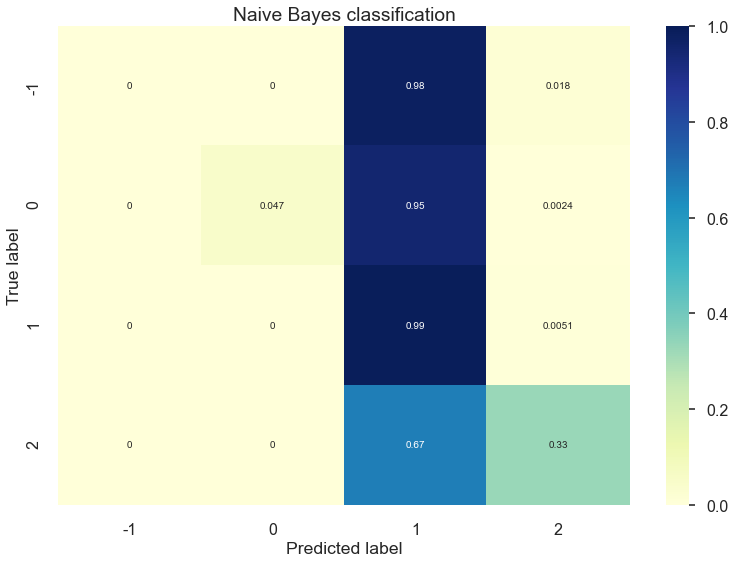

In [62]:
# Generate a classification Report for the Naive Bayes model
print(metrics.classification_report(y_valid, y_pred_nb))

# Generate a normalized confusion matrix
cm = confusion_matrix(y_valid, y_pred_nb)
cm_norm = cm / cm.sum(axis=1).reshape(-1,1)

# Display the confusion matrix as a heatmap
sns.heatmap(cm_norm, 
            cmap="YlGnBu", 
            xticklabels=nb.classes_, 
            yticklabels=nb.classes_, 
            vmin=0., 
            vmax=1., 
            annot=True, 
            annot_kws={'size':10})

# Adding headings and lables
plt.title('Naive Bayes classification')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

#### K Nearest Neighbors classification
KNN Classifier would use one of the distance criteria to classify the new datapoint class.

              precision    recall  f1-score   support

          -1       0.58      0.42      0.49       278
           0       0.48      0.41      0.44       425
           1       0.74      0.81      0.77      1755
           2       0.69      0.68      0.68       706

    accuracy                           0.69      3164
   macro avg       0.62      0.58      0.60      3164
weighted avg       0.68      0.69      0.68      3164



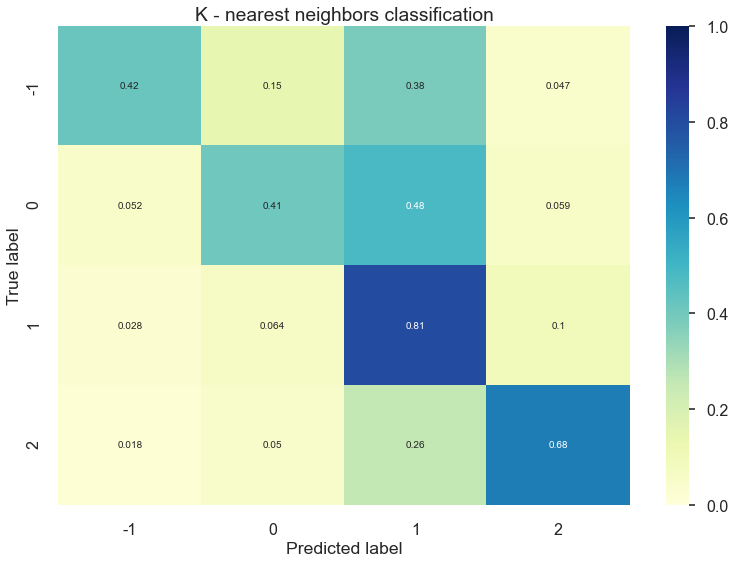

In [63]:
# Generate a classification Report for the K-nearest neighbors model
print(metrics.classification_report(y_valid, y_pred_knn))

# Generate a normalized confusion matrix
cm = confusion_matrix(y_valid, y_pred_knn)
cm_norm = cm / cm.sum(axis=1).reshape(-1,1)

# Display the confusion matrix as a heatmap
sns.heatmap(cm_norm, 
            cmap="YlGnBu", 
            xticklabels=knn.classes_, 
            yticklabels=knn.classes_, 
            vmin=0., 
            vmax=1., 
            annot=True, 
            annot_kws={'size':10})

# Adding headings and lables
plt.title('K - nearest neighbors classification')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

              precision    recall  f1-score   support

          -1       0.58      0.42      0.49       278
           0       0.48      0.41      0.44       425
           1       0.74      0.81      0.77      1755
           2       0.69      0.68      0.68       706

    accuracy                           0.69      3164
   macro avg       0.62      0.58      0.60      3164
weighted avg       0.68      0.69      0.68      3164



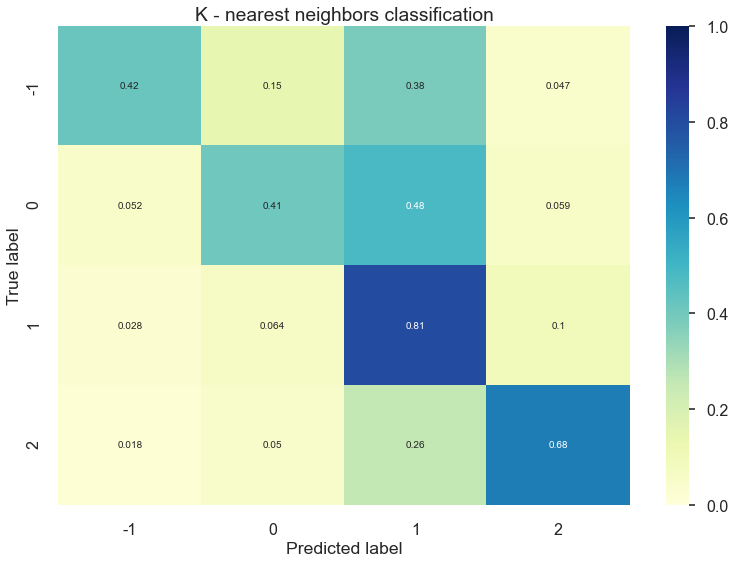

In [64]:
# Generate a classification Report for the K-nearest neighbors model
print(metrics.classification_report(y_valid, y_pred_knn))

# Generate a normalized confusion matrix
cm = confusion_matrix(y_valid, y_pred_knn)
cm_norm = cm / cm.sum(axis=1).reshape(-1,1)

# Display the confusion matrix as a heatmap
sns.heatmap(cm_norm, 
            cmap="YlGnBu", 
            xticklabels=knn.classes_, 
            yticklabels=knn.classes_, 
            vmin=0., 
            vmax=1., 
            annot=True, 
            annot_kws={'size':10})

# Adding headings and lables
plt.title('K - nearest neighbors classification')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()


#### Observations:
KNN is able to successfully classify the tweets.

#### Logistic regression classification

              precision    recall  f1-score   support

          -1       0.55      0.64      0.59       278
           0       0.48      0.55      0.51       425
           1       0.85      0.69      0.76      1755
           2       0.66      0.87      0.75       706

    accuracy                           0.71      3164
   macro avg       0.64      0.69      0.65      3164
weighted avg       0.73      0.71      0.71      3164



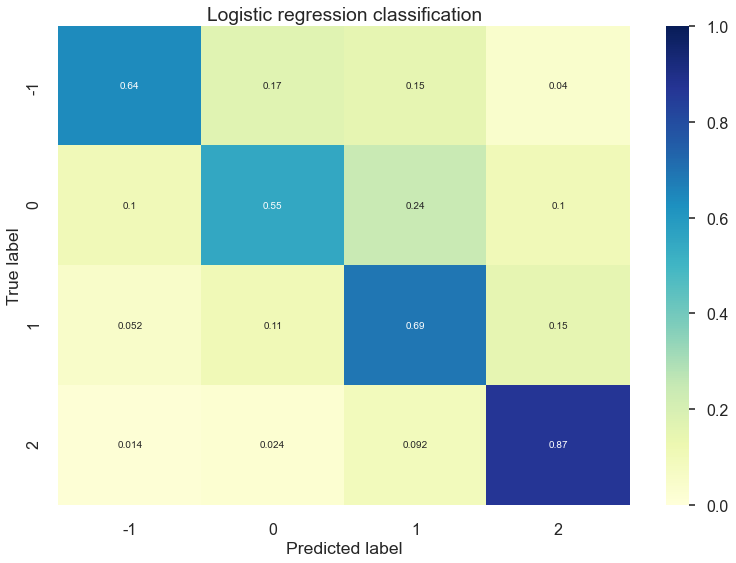

In [65]:
# Generate a classification Report for the model
print(metrics.classification_report(y_valid, y_pred_lr))

cm = confusion_matrix(y_valid, y_pred_lr)
cm_norm = cm / cm.sum(axis=1).reshape(-1,1)

sns.heatmap(cm_norm, 
            cmap="YlGnBu", 
            xticklabels=lr.classes_, 
            yticklabels=lr.classes_, 
            vmin=0., 
            vmax=1., 
            annot=True, 
            annot_kws={'size':10})

# Adding headings and lables
plt.title('Logistic regression classification')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

#### Linear SVC classification

              precision    recall  f1-score   support

          -1       0.62      0.57      0.59       278
           0       0.54      0.47      0.51       425
           1       0.82      0.79      0.81      1755
           2       0.71      0.84      0.77       706

    accuracy                           0.74      3164
   macro avg       0.67      0.67      0.67      3164
weighted avg       0.74      0.74      0.74      3164



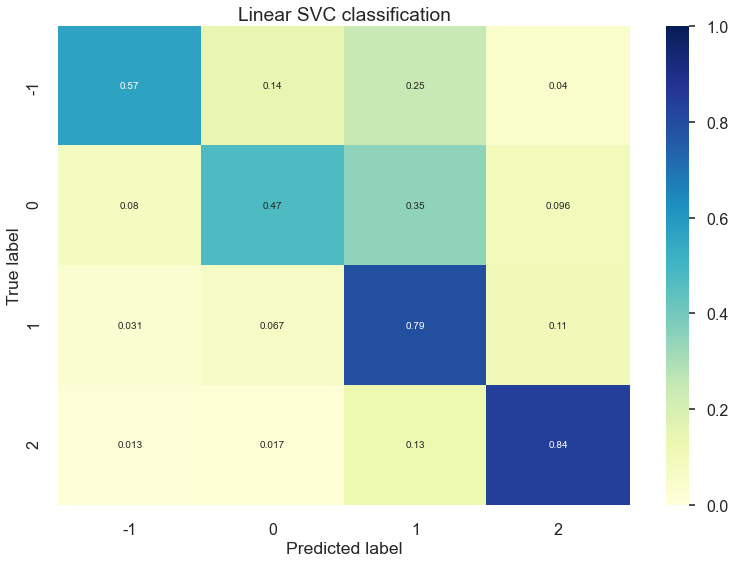

In [66]:
# Generate a classification Report for the linear SVC model
print(metrics.classification_report(y_valid, y_pred_lsvc))

# Generate a normalized confusion matrix
cm = confusion_matrix(y_valid, y_pred_lsvc)
cm_norm = cm / cm.sum(axis=1).reshape(-1,1)

# Display the confusion matrix as a heatmap
sns.heatmap(cm_norm, 
            cmap="YlGnBu", 
            xticklabels=lsvc.classes_, 
            yticklabels=lsvc.classes_, 
            vmin=0., 
            vmax=1., 
            annot=True, 
            annot_kws={'size':10})

# Adding headings and lables
plt.title('Linear SVC classification')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

## Model Selection

Linear SVC has achieved the highest F1 score of 0.75 and is therefore our model of choice moving forward.

#### Hyperparameter tuning

Once our top performing model has been selected, we attempt to improve it by performing some hyperparameter tuning.

After the optimal parameters are determined the linear SVC model is retrained using these parameters, resulting in a 2% increase in the F1 score.

In [67]:
# Retrain linear SVC using optimal hyperparameters:
lsvc_op = Pipeline([('tfidf', TfidfVectorizer(max_df=0.8,
                                                    min_df=2,
                                                    ngram_range=(1,2))),
                  ('clf', LinearSVC(C=0.3,
                                    class_weight='balanced',
                                    max_iter=3000))])

# Fit and predict
lsvc_op.fit(X_train, y_train)
y_pred = lsvc_op.predict(X_valid)

print('F1 score improved by',
      round(100*((metrics.accuracy_score(y_pred, y_valid) - metrics.accuracy_score(y_pred_lsvc, y_valid)) /metrics.accuracy_score(y_pred_lsvc, y_valid)),0), 
      '%')

F1 score improved by 3.0 %


## End Comet experiment

In [68]:
# Saving each metric to add to a dictionary for logging
f1 = f1_score(y_valid, y_pred, average='weighted')
precision = precision_score(y_valid, y_pred, average='weighted')
recall = recall_score(y_valid, y_pred, average='weighted')

# Create dictionaries for the data we want to log          
metrics = {"f1": f1,
           "recall": recall,
           "precision": precision}

params= {'classifier': 'linear SVC',
         'max_df': 0.8,
         'min_df': 2,
         'ngram_range': '(1,2)',
         'vectorizer': 'Tfidf',
         'scaling': 'no',
         'resampling': 'no',
         'test_train random state': '0'}
  
# Log info on comet
experiment.log_metrics(metrics)
experiment.log_parameters(params)

# Log image
experiment.log_image(metrics)

# End experiment
experiment.end()

# Display results on comet page
experiment.display()

COMET ERROR: invalid image file_type: <class 'dict'>
COMET ERROR: Could not convert image_data into an image; ignored
COMET INFO: ---------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : https://www.comet.ml/thobekanimasondo84-gmail-com/global-warming-climate-change-sentiment-analysis-zm3/0ab5d5ba95a1458499e7933c4efb9bbd
COMET INFO:   Metrics:
COMET INFO:     f1        : 0.7613124921879227
COMET INFO:     precision : 0.762291030040826
COMET INFO:     recall    : 0.7626422250316056
COMET INFO:   Parameters:
COMET INFO:     C                             : 0.3
COMET INFO:     algorithm                     : auto
COMET INFO:     alpha                         : 1.0
COMET INFO:     bootstrap                     : True
COMET INFO:     ccp_alpha                     : 1
COMET INFO:     class_prior                   : 1
COMET INFO:     class_wei

COMET INFO:     tfidf__ngram_range            : (1, 2)
COMET INFO:     tfidf__norm                   : l2
COMET INFO:     tfidf__preprocessor           : 1
COMET INFO:     tfidf__smooth_idf             : True
COMET INFO:     tfidf__stop_words             : 1
COMET INFO:     tfidf__strip_accents          : 1
COMET INFO:     tfidf__sublinear_tf           : 1
COMET INFO:     tfidf__token_pattern          : (?u)\b\w\w+\b
COMET INFO:     tfidf__tokenizer              : 1
COMET INFO:     tfidf__use_idf                : True
COMET INFO:     tfidf__vocabulary             : 1
COMET INFO:     tfidf_analyzer                : word
COMET INFO:     tfidf_binary                  : 1
COMET INFO:     tfidf_decode_error            : strict
COMET INFO:     tfidf_dtype                   : <class 'numpy.float64'>
COMET INFO:     tfidf_encoding                : utf-8
COMET INFO:     tfidf_input                   : content
COMET INFO:     tfidf_lowercase               : True
COMET INFO:     tfidf_max_df     

## Submission

In [69]:
test = pd.read_csv('test_with_no_labels.csv')
y_test = lsvc_op.predict(test['message'])
output = pd.DataFrame({'tweetid': test.tweetid,
                       'sentiment': y_test})
output.to_csv('Submission_4.csv', index=False)
output

,tweetid,sentiment
0,169760,1
1,35326,1
2,224985,1
3,476263,1
4,872928,0
...,...,...
10541,895714,1
10542,875167,1
10543,78329,0
10544,867455,0


# Conclusion<a name="conclusion"></a>

[Return to top](#top) <br><br>
#### Model performance
Several strategies we attempted to improve model performance, ranging from data processing techniques to clean the tweets, data balancing strategies, cross validation and grid search for the best values for model hyperparameters.

On the whole, the models performed better on the uncleaned data. Data balancing strategies yielded little to no improvement in model performance. A few models that were tried resulted in overfitting.


#### What else we can try
Language models and the use of neural networks were two other strategies that we wanted to implement, to see how the performance of model improves with the use of a language model, and how a neural network performance.

#### Business case value

From the above analysis, the story that is emerging is fairly clear; the sentiment from the negative class of tweets is that of individuals who consider the science of climate change as being a hoax. Seeing that the debate has also become ideological, it would probably be best to tailor a message to this group that does not emphasize the environmental friendliness and sustainability aspects of the products and services, but rather a message that speaks to product features and price etc, would be the best approach when targeting this group.

On the other hand, individuals from the positive class of tweets certainly believe in climate change, it is however not clear whether these individuals in their daily lives necessarily make decisions based on the environmental friendliness and sustainability of the products and services they purchase. Emphasizing a message of environmental friendliness and sustainability within this group, will not negatively impact how the products and services are received.


Some organisations are mentioned in the tweets, many which share the same values and ideals when it comes to protecting the environment, who have a substantial membership and following on social media of individuals who share the same values and ideals. The formation of potential partnerships with these organisations could lead to brand exposure with individuals who in their daily lives make conscious decisions with regards to the products and services they purchase.

We recommend that the latter strategy of pursuing partnerships with like minded organisations will yield the best results, in terms of finding a group of potential customers who share the same values and ideals, and would be likely to purchase your products and services.